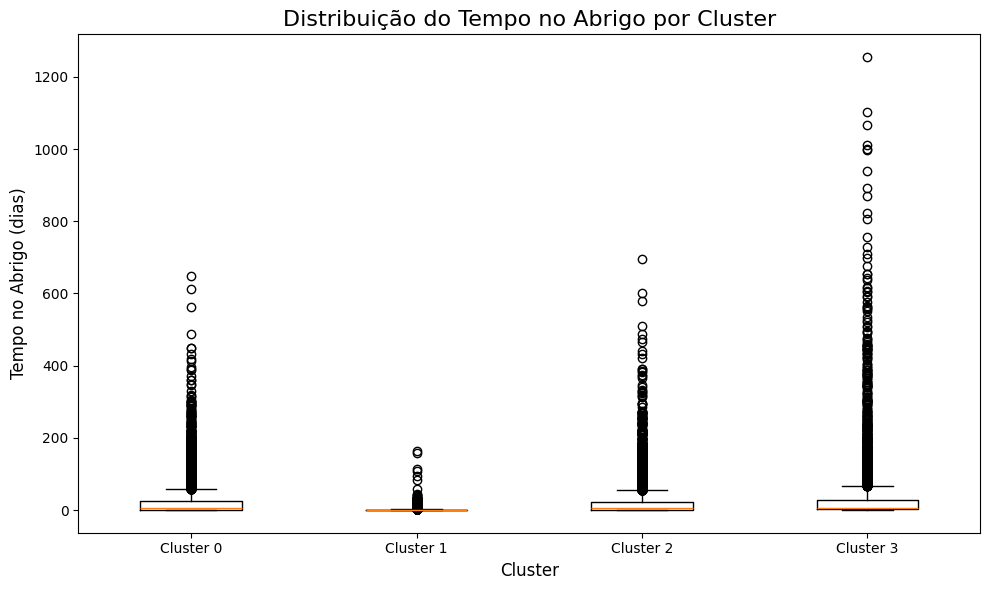

In [14]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Caminho para o dataset escalado e o dataset original limpo
dataset_path_scaled = '../data/scaled_ACC_INTAKES_OUTCOMES.parquet'
dataset_path_cleaned = '../data/data_cleaned.parquet'

# Carregar os datasets
data_scaled = pd.read_parquet(dataset_path_scaled)
data_cleaned = pd.read_parquet(dataset_path_cleaned)

# Definir o número de clusters
n_clusters = 4

# Selecionar as features para o KMeans (dados escalados)
cluster_features_scaled = [
    "age_upon_intake_(years)_scaled",
    "age_upon_outcome_(years)_scaled",
    "time_in_shelter_days_scaled",
    "outcome_type_Adoption       ",
    "outcome_type_Died           ",
    "outcome_type_Euthanasia     ",
    "outcome_type_Missing        ",
    "outcome_type_Return to Owner",
    "outcome_type_Transfer       ",
    "sex_upon_outcome_Intact Female",
    "sex_upon_outcome_Intact Male  ",
    "sex_upon_outcome_Neutered Male",
    "sex_upon_outcome_Spayed Female",
    "sex_upon_outcome_Unknown      ",
    "animal_type_Bir",
    "animal_type_Cat",
    "animal_type_Dog",
    "animal_type_Oth",
    "intake_condition_Aged   ",
    "intake_condition_Feral  ",
    "intake_condition_Injured",
    "intake_condition_Normal ",
    "intake_condition_Nursing",
    "intake_condition_Other  ",
    "intake_condition_Pregnan",
    "intake_condition_Sick   ",
    "sex_upon_intake_Intact Female",
    "sex_upon_intake_Intact Male  ",
    "sex_upon_intake_Neutered Male",
    "sex_upon_intake_Spayed Female",
    "sex_upon_intake_Unknown      ",
    "is_mix_breed",
    "color_Black",
    "color_Brown/Chocolate",
    "color_Gray/Blue",
    "color_Other_Colors",
    "color_Patterned",
    "color_Red/Orange",
    "color_White",
    "color_Yellow/Gold/Cream"    
]

# Criar o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled[cluster_features_scaled])

# Adicionar os clusters ao dataframe escalado
data_scaled['cluster'] = clusters

# Adicionar os valores originais de 'time_in_shelter_days' ao dataframe escalado
data_scaled['time_in_shelter_days_original'] = data_cleaned['time_in_shelter_days']

# Plotar a distribuição do tempo no abrigo por cluster (usando a coluna 'time_in_shelter_days_original')
plt.figure(figsize=(10, 6))
plt.boxplot([data_scaled.loc[data_scaled['cluster'] == i, 'time_in_shelter_days_original'] for i in range(n_clusters)])
plt.title('Distribuição do Tempo no Abrigo por Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Tempo no Abrigo (dias)', fontsize=12)
plt.xticks(range(1, n_clusters + 1), [f'Cluster {i}' for i in range(n_clusters)])
plt.tight_layout()

# Exibir o gráfico
plt.show()


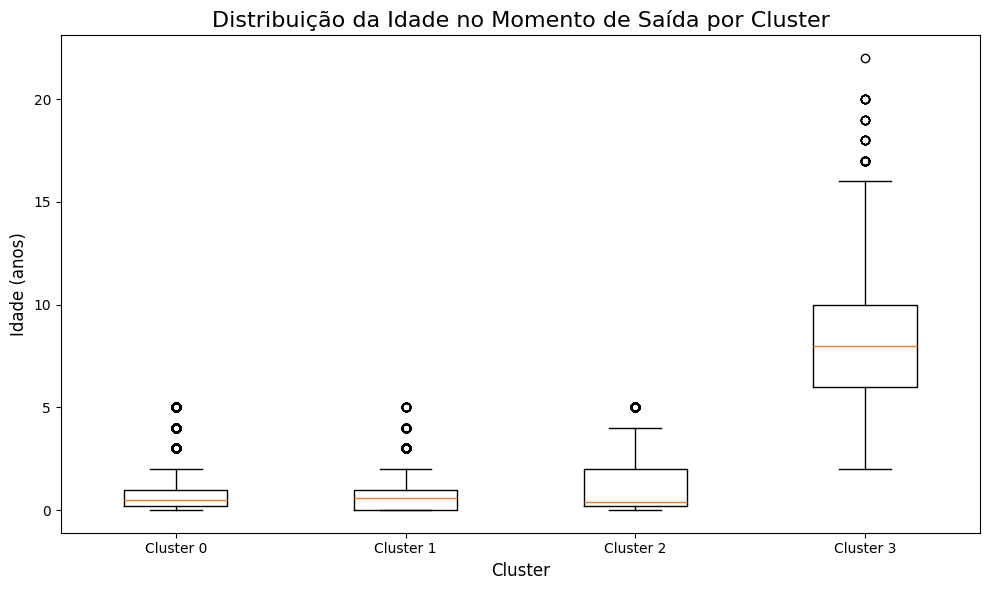

In [12]:
# Caminho para o dataset original limpo
dataset_path_cleaned = '../data/data_cleaned.parquet'

# Carregar o dataset original limpo para obter os valores originais da idade
data_cleaned = pd.read_parquet(dataset_path_cleaned)

# Adicionar os valores originais da coluna 'age_upon_outcome_(years)' do dataset limpo ao dataframe padronizado
data_scaled['age_upon_outcome_(years)_original'] = data_cleaned['age_upon_outcome_(years)']

# Plotar a distribuição da idade no momento de saída por cluster (com valores originais de idade)
plt.figure(figsize=(10, 6))
plt.boxplot([data_scaled.loc[data_scaled['cluster'] == i, 'age_upon_outcome_(years)_original'] for i in range(n_clusters)])
plt.title('Distribuição da Idade no Momento de Saída por Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Idade (anos)', fontsize=12)
plt.xticks(range(1, n_clusters + 1), [f'Cluster {i}' for i in range(n_clusters)])
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [27]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

# Definir a escala de cores personalizada
color_scale = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#1abc9c', '#e67e22', '#34495e', '#ff6b6b', '#48dbfb']

# Carregar o dataset escalado
dataset_path = '../data/scaled_ACC_INTAKES_OUTCOMES.parquet'
data_scaled = pd.read_parquet(dataset_path)

# Definir o número de clusters
n_clusters = 4


# Criar o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled[cluster_features_scaled])

# Adicionar os clusters ao dataframe
data_scaled['cluster'] = clusters

# Criar o gráfico de barras empilhadas para a distribuição dos tipos de saída por cluster

# Filtrar as colunas relevantes para os tipos de saída
outcome_columns = [
    "outcome_type_Adoption       ",
    "outcome_type_Died           ",
    "outcome_type_Euthanasia     ",
    "outcome_type_Missing        ",
    "outcome_type_Return to Owner",
    "outcome_type_Transfer       "
]

# Criar um dicionário para mapear os nomes das colunas para as legendas desejadas
outcome_labels = {
    'outcome_type_Died           ': 'Morreu',
    'outcome_type_Euthanasia     ': 'Eutanásia',
    'outcome_type_Missing        ': 'Perdido',
    'outcome_type_Return to Owner': 'Retornou ao dono',
    'outcome_type_Transfer       ': 'Transferido para abrigo parceiro',
    'outcome_type_Adoption       ': 'Adotado'
}

# Criar o dataframe para o gráfico de barras empilhadas
outcome_data = data_scaled.groupby('cluster')[outcome_columns].sum().reset_index()

# Renomear as colunas de acordo com as legendas desejadas
outcome_data = outcome_data.rename(columns=outcome_labels)

# Converter o dataframe para um formato longo para facilitar o uso com Plotly
outcome_data_melted = outcome_data.melt(id_vars='cluster', 
                                        value_vars=list(outcome_labels.values()), 
                                        var_name='Tipo de Saída', 
                                        value_name='Quantidade')

# Criar o gráfico de barras empilhadas usando Plotly
fig_stacked_bar = px.bar(outcome_data_melted, x='cluster', y='Quantidade', 
                         color='Tipo de Saída', 
                         color_discrete_sequence=color_scale[:len(outcome_labels)],
                         labels={'cluster': 'Cluster', 'Quantidade': 'Quantidade'},
                         title='Distribuição dos Tipos de Saída por Cluster')
                         

# Exibir o gráfico
fig_stacked_bar.show()



In [29]:
# Importar as bibliotecas necessárias
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Definir a escala de cores personalizada
color_scale = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#1abc9c', '#e67e22', '#34495e', '#ff6b6b', '#48dbfb']

# Carregar o dataset escalado (reutilizando já escalado do notebook 1)
dataset_path = '../data/scaled_ACC_INTAKES_OUTCOMES.parquet'
data_scaled = pd.read_parquet(dataset_path)

# Definir o número de clusters
n_clusters = 4

# Selecionar as features para o KMeans
cluster_features_scaled = [
    "age_upon_intake_(years)_scaled",
    "age_upon_outcome_(years)_scaled",
    "time_in_shelter_days_scaled",
    "outcome_type_Adoption       ",
    "outcome_type_Died           ",
    "outcome_type_Euthanasia     ",
    "outcome_type_Missing        ",
    "outcome_type_Return to Owner",
    "outcome_type_Transfer       ",
    "sex_upon_outcome_Intact Female",
    "sex_upon_outcome_Intact Male  ",
    "sex_upon_outcome_Neutered Male",
    "sex_upon_outcome_Spayed Female",
    "sex_upon_outcome_Unknown      ",
    "animal_type_Bir",
    "animal_type_Cat",
    "animal_type_Dog",
    "animal_type_Oth",
    "intake_condition_Aged   ",
    "intake_condition_Feral  ",
    "intake_condition_Injured",
    "intake_condition_Normal ",
    "intake_condition_Nursing",
    "intake_condition_Other  ",
    "intake_condition_Pregnan",
    "intake_condition_Sick   ",
    "sex_upon_intake_Intact Female",
    "sex_upon_intake_Intact Male  ",
    "sex_upon_intake_Neutered Male",
    "sex_upon_intake_Spayed Female",
    "sex_upon_intake_Unknown      ",
    "is_mix_breed",
    "color_Black",
    "color_Brown/Chocolate",
    "color_Gray/Blue",
    "color_Other_Colors",
    "color_Patterned",
    "color_Red/Orange",
    "color_White",
    "color_Yellow/Gold/Cream"    
]

# Criar o modelo KMeans e adicionar os clusters ao dataframe
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled[cluster_features_scaled])

# Adicionar a coluna 'cluster' ao dataframe
data_scaled['cluster'] = clusters

# Filtrar as colunas relevantes para as condições de saúde na entrada
intake_condition_columns = [
    "intake_condition_Aged   ",
    "intake_condition_Feral  ",
    "intake_condition_Injured",
    "intake_condition_Normal ",
    "intake_condition_Nursing",
    "intake_condition_Other  ",
    "intake_condition_Pregnan",
    "intake_condition_Sick   "
]

# Criar um dicionário para mapear os nomes das colunas para as legendas desejadas
intake_condition_labels = {
    'intake_condition_Aged   ': 'Idoso',
    'intake_condition_Feral  ': 'Feroz',
    'intake_condition_Injured': 'Ferido',
    'intake_condition_Normal ': 'Normal',
    'intake_condition_Nursing': 'Amamentando',
    'intake_condition_Other  ': 'Outros',
    'intake_condition_Pregnan': 'Grávida',
    'intake_condition_Sick   ': 'Doente'
}

# Criar o dataframe para o gráfico de barras empilhadas
intake_condition_data = data_scaled.groupby('cluster')[intake_condition_columns].sum().reset_index()

# Renomear as colunas de acordo com as legendas desejadas
intake_condition_data = intake_condition_data.rename(columns=intake_condition_labels)

# Converter o dataframe para um formato longo para facilitar o uso com Plotly
intake_condition_data_melted = intake_condition_data.melt(id_vars='cluster', 
                                                          value_vars=list(intake_condition_labels.values()), 
                                                          var_name='Condição de Saúde', 
                                                          value_name='Quantidade')

# Criar o gráfico de barras empilhadas usando Plotly
fig_intake_condition_stacked_bar = px.bar(
    intake_condition_data_melted, 
    x='cluster', 
    y='Quantidade', 
    color='Condição de Saúde', 
    color_discrete_sequence=color_scale[:len(intake_condition_labels)], 
    labels={'cluster': 'Cluster', 'Quantidade': 'Quantidade'},
    title='Distribuição das Condições de Saúde na Entrada por Cluster'
)

# Exibir o gráfico
fig_intake_condition_stacked_bar.show()


In [31]:
# Importar as bibliotecas necessárias
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Definir a escala de cores personalizada
color_scale = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#1abc9c', '#e67e22', '#34495e', '#ff6b6b', '#48dbfb']

# Carregar o dataset escalado
dataset_path = '../data/scaled_ACC_INTAKES_OUTCOMES.parquet'
data_scaled = pd.read_parquet(dataset_path)

# Definir o número de clusters
n_clusters = 4

# Selecionar as features para o KMeans
cluster_features_scaled = [
    "age_upon_intake_(years)_scaled",
    "age_upon_outcome_(years)_scaled",
    "time_in_shelter_days_scaled",
    "outcome_type_Adoption       ",
    "outcome_type_Died           ",
    "outcome_type_Euthanasia     ",
    "outcome_type_Missing        ",
    "outcome_type_Return to Owner",
    "outcome_type_Transfer       ",
    "sex_upon_outcome_Intact Female",
    "sex_upon_outcome_Intact Male  ",
    "sex_upon_outcome_Neutered Male",
    "sex_upon_outcome_Spayed Female",
    "sex_upon_outcome_Unknown      ",
    "animal_type_Bir",
    "animal_type_Cat",
    "animal_type_Dog",
    "animal_type_Oth",
    "intake_condition_Aged   ",
    "intake_condition_Feral  ",
    "intake_condition_Injured",
    "intake_condition_Normal ",
    "intake_condition_Nursing",
    "intake_condition_Other  ",
    "intake_condition_Pregnan",
    "intake_condition_Sick   ",
    "sex_upon_intake_Intact Female",
    "sex_upon_intake_Intact Male  ",
    "sex_upon_intake_Neutered Male",
    "sex_upon_intake_Spayed Female",
    "sex_upon_intake_Unknown      ",
    "is_mix_breed",
    "color_Black",
    "color_Brown/Chocolate",
    "color_Gray/Blue",
    "color_Other_Colors",
    "color_Patterned",
    "color_Red/Orange",
    "color_White",
    "color_Yellow/Gold/Cream"
]

# Criar o modelo KMeans e ajustar os clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled[cluster_features_scaled])

# Adicionar os clusters ao dataframe
data_scaled['cluster'] = clusters

# Filtrar as colunas relevantes para os tipos de animais
animal_columns = ['animal_type_Bir', 'animal_type_Cat', 'animal_type_Dog', 'animal_type_Oth']

# Renomear as colunas para exibição mais clara
column_rename_mapping = {
    'animal_type_Bir': 'Pássaro',
    'animal_type_Cat': 'Gato(a)',
    'animal_type_Dog': 'Cachorro(a)',
    'animal_type_Oth': 'Outros tipos de animais'
}

# Renomear as colunas no dataset escalado
data_scaled = data_scaled.rename(columns=column_rename_mapping)

# Criar o dataframe para o gráfico de barras empilhadas
animal_data = data_scaled.groupby('cluster')[list(column_rename_mapping.values())].sum().reset_index()

# Converter o dataframe para um formato longo para facilitar o uso com Plotly
animal_data_melted = animal_data.melt(id_vars='cluster', 
                                      value_vars=list(column_rename_mapping.values()), 
                                      var_name='Tipo de Animal', 
                                      value_name='Quantidade')

# Criar o gráfico de barras empilhadas usando Plotly
fig_stacked_bar_animals = px.bar(animal_data_melted, x='cluster', y='Quantidade', 
                                 color='Tipo de Animal', 
                                 color_discrete_sequence=color_scale[:len(animal_columns)],
                                 labels={'cluster': 'Cluster', 'Quantidade': 'Quantidade'},
                                 title='Distribuição dos Tipos de Animais por Cluster')

# Exibir o gráfico
fig_stacked_bar_animals.show()


In [33]:
# Importar as bibliotecas necessárias
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Carregar o dataset escalado
dataset_path = '../data/scaled_ACC_INTAKES_OUTCOMES.parquet'
data_scaled = pd.read_parquet(dataset_path)

# Definir o número de clusters
n_clusters = 4

# Selecionar as features para o KMeans (conforme o código anterior)
cluster_features_scaled = [
    "age_upon_intake_(years)_scaled",
    "age_upon_outcome_(years)_scaled",
    "time_in_shelter_days_scaled",
    "outcome_type_Adoption       ",
    "outcome_type_Died           ",
    "outcome_type_Euthanasia     ",
    "outcome_type_Missing        ",
    "outcome_type_Return to Owner",
    "outcome_type_Transfer       ",
    "sex_upon_outcome_Intact Female",
    "sex_upon_outcome_Intact Male  ",
    "sex_upon_outcome_Neutered Male",
    "sex_upon_outcome_Spayed Female",
    "sex_upon_outcome_Unknown      ",
    "animal_type_Bir",
    "animal_type_Cat",
    "animal_type_Dog",
    "animal_type_Oth",
    "intake_condition_Aged   ",
    "intake_condition_Feral  ",
    "intake_condition_Injured",
    "intake_condition_Normal ",
    "intake_condition_Nursing",
    "intake_condition_Other  ",
    "intake_condition_Pregnan",
    "intake_condition_Sick   ",
    "sex_upon_intake_Intact Female",
    "sex_upon_intake_Intact Male  ",
    "sex_upon_intake_Neutered Male",
    "sex_upon_intake_Spayed Female",
    "sex_upon_intake_Unknown      ",
    "is_mix_breed",
    "color_Black",
    "color_Brown/Chocolate",
    "color_Gray/Blue",
    "color_Other_Colors",
    "color_Patterned",
    "color_Red/Orange",
    "color_White",
    "color_Yellow/Gold/Cream"
]

# Criar o modelo KMeans e adicionar os clusters ao dataframe
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_scaled['cluster'] = kmeans.fit_predict(data_scaled[cluster_features_scaled])

# Criar o dataframe para o gráfico de barras empilhadas
breed_data = data_scaled.groupby(['cluster', 'is_mix_breed']).size().unstack(fill_value=0)

# Renomear as colunas para exibição mais clara
breed_data = breed_data.rename(columns={0: 'Raça Pura', 1: 'Raça Misturada'})

# Converter o dataframe para um formato longo para facilitar o uso com Plotly
breed_data_melted = breed_data.reset_index().melt(id_vars='cluster', 
                                                  value_vars=['Raça Pura', 'Raça Misturada'], 
                                                  var_name='Tipo de Raça', 
                                                  value_name='Quantidade')

# Criar o gráfico de barras empilhadas
fig_stacked_bar_breeds = px.bar(breed_data_melted, x='cluster', y='Quantidade', 
                                color='Tipo de Raça', 
                                color_discrete_sequence=['#3498db', '#e74c3c'],  # Cores específicas para cada tipo de raça
                                labels={'cluster': 'Cluster', 'Quantidade': 'Quantidade'},
                                title='Distribuição de Raça Pura ou Misturada por Cluster')

# Exibir o gráfico
fig_stacked_bar_breeds.show()
